# The Bias-Variance Tradeoff

Let $y_{noisy}$ be the observable function and $\hat{y}$ be the hypothesis function. If the number of samples, $N$, considered in calculating the prediction error for a set of unpublished examples (also called the generalization error) tends to infinity, then the error can be approximated as the expected squared error:

$$\text{MSE}_{N \to \infty} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (y_{noisy } - \hat{y})^2
%
\\ = E[(y_{noisy} - \hat{y})^2].
$$

Remembering that $y_{noisy} = y + w$, so
$$E[(y_{noisy} - \hat{y})^2] = E[(y + w - \hat{y})^2].$$

Expanding the above equation and grouping some terms, we have

$$ E[ (y - \hat{y})^2 + 2 w (y - \hat{y}) + w^2 ].$$

Since $w$ is Gaussian white noise, then $E[w] = 0$, and thus the above equation can be simplified to

$$E[ (y - \hat{y})^2 + w^2 ] \\= E[ (y - \hat{y})^2 ] + E[ w^2 ],$$

where the first term is the **reducible error** and the second term the **irreducible error**, the one due to noise that we cannot reduce.

We were able to expand the first term and separate the terms referring to **variance** and **bias** of this estimator. Assuming that the values ​​of $y$ are non-random (i.e., deterministic), we can rewrite the second term as

$$E[ (y - \hat{y})^2 ] = y^2 -2 y E[\hat{y}] + E[\hat{y}^2].$$

The last term of the above equation can be rewritten as $E[\hat{y}^2] = \text{var}(\hat{y}) + E[\hat{y}]^2$, and , then we have

$$E[ (y - \hat{y})^2 ] = (y - E[\hat{y}])^2 + (E[\hat{y}^2]-E[\hat{y }]^2) \\= \text{bias}(\hat{y})^2 + \text{var}(\hat{y}).$$

The first term of the above equation gives us the **bias** value squared, while the second term gives us the **variance** of the estimator.

Therefore, we can rewrite the squared error expectation equation as

$$E[(y_{noisy} - \hat{y})^2] = \text{bias}(\hat{y})^2 + \text{var}(\hat{y}) + E[ w^2 ].$$

The first two terms are always positive, so $E[(y_{noisy} - \hat{y})^2]$ will never equal zero if $E[ w^2 ] \neq 0$.

If the noise, $w$, has a mean of zero, then $E[ w^2 ]=\text{var}(w)$.

We can also see that to minimize the error, we must have both **bias** and **variance** values ​​as small as possible. Therefore, to have a model that generalizes well, both values ​​must be small.

+ **generalization error**: resulting from the sum of bias, variance and irreducible errors.
    * May be approximated by **validation error**.
+ **bias** (or bias): part of the generalization error that says, on average, how much $\hat{y} \neq y$, that is, it measures the error between the mean of the approximation and the true function. It is a measure of how well the model captures the behavior of the true function.
    * A model has a high **bias** when, for example, it fails to capture the behavior of the generating model.
+ **variance**: part of the generalization error that tells how inconsistent $\hat{y}$ is (i.e., varies) across different training sets. Measures the variation in model performance when it fits different training sets.
    * A model has high **variance** when, for example, it trains so well that it captures not only the significant patterns, but also the noise present in the data.
+ **irreducible error**: is the lower bound of the generalization error. It is the error caused by elements beyond our control, such as noise in the samples.

The challenge for having an **optimal model** lies in finding the ideal **capacity (or flexibility)** or **balance point**: point where the values ​​of **bias** and **variance* * are low.

<img src="../img/erros_aproximação_estimaçãov2.png" width="400" height="400">

+ If we increase the flexibility of the model, its variance increases and its bias decreases.
+ If we decrease the flexibility of the model, its variance decreases and its bias increases.

In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#!pip3 install mlxtend
from mlxtend.evaluate import bias_variance_decomp

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.3 MB 7.3 MB/s            
  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
     |████████████████████████████████| 1.3 MB 35.1 MB/s            
     |████████████████████████████████| 1.3 MB 61.7 MB/s            
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)


In [3]:
# Reset the pseudo random number generator so that the results are reproducible.
seed = 1012019
np.random.seed(seed)

In [4]:
def genTargetFunction(N):
    # Attribute.
    x1 = np.linspace(-3, 3, N).reshape(N, 1)
    # Create target function.
    y = 1.0 + x1 + x1**2
    # Noisy version of the target function.
    y_noisy = y + np.random.randn(N, 1)
    return x1, y_noisy, y

In [5]:
# Number of examples.
N = 200

# Generate dataset.
x1, y_noisy, y = genTargetFunction(N)

# Split dataset.
X_train, X_test, y_train, y_test = train_test_split(x1, y_noisy, test_size=0.5, random_state=seed)

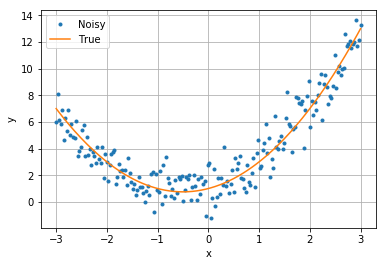

In [6]:
plt.plot(x1,y_noisy,'.', label='Noisy')
plt.plot(x1,y,label='True')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
# Polinomial degrees to be tested.
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Include column of ones once the target function has a bias.
include_bias = True

mse = np.zeros((len(degrees),))
var = np.zeros((len(degrees),))
bias = np.zeros((len(degrees),))

# Iterate over different polynomial degrees.
for i in range(len(degrees)):
    
        # Instantiate a polynomial with the given degree.
        poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
        # Instantiate a scaler that will standardize the features.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        model = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])
    
        # estimate bias and variance
        mse[i], bias[i], var[i] = bias_variance_decomp(model, X_train, y_train.ravel(), X_test, y_test.ravel(), loss='mse', num_rounds=200, random_seed=seed)        

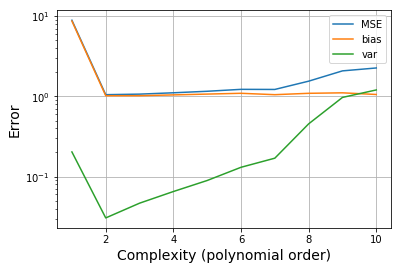

In [15]:
fig = plt.figure()

plt.plot(degrees, mse, label='MSE')
plt.plot(degrees, bias, label='bias')
plt.plot(degrees, var, label='var')
plt.yscale('log')
plt.legend()
plt.xlabel('Complexity (polynomial order)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.grid()

if(0):
    left, bottom, width, height = [0.3, 0.55, 0.4, 0.3]
    ax3 = fig.add_axes([left, bottom, width, height])
    plt.plot(degrees, mse, label='MSE')
    plt.plot(degrees, bias, label='bias')
    plt.plot(degrees, var, label='var')
    ax3.set_ylim(-0.5, 2)
    ax3.set_xlim(1, 10)

plt.show()

### Referências

[1] https://dustinstansbury.github.io/theclevermachine/bias-variance-tradeoff